In [2]:
import pandas as pd

import numpy as np

import seaborn as sns 

import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    classification_report
)

from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("heart.csv")

print("Dataset Preview:")

print(data.head()) 

Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
print("\nDataset Information:")

data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB



Visualizing Pairplots for Numerical Features:


<Figure size 2000x2000 with 0 Axes>

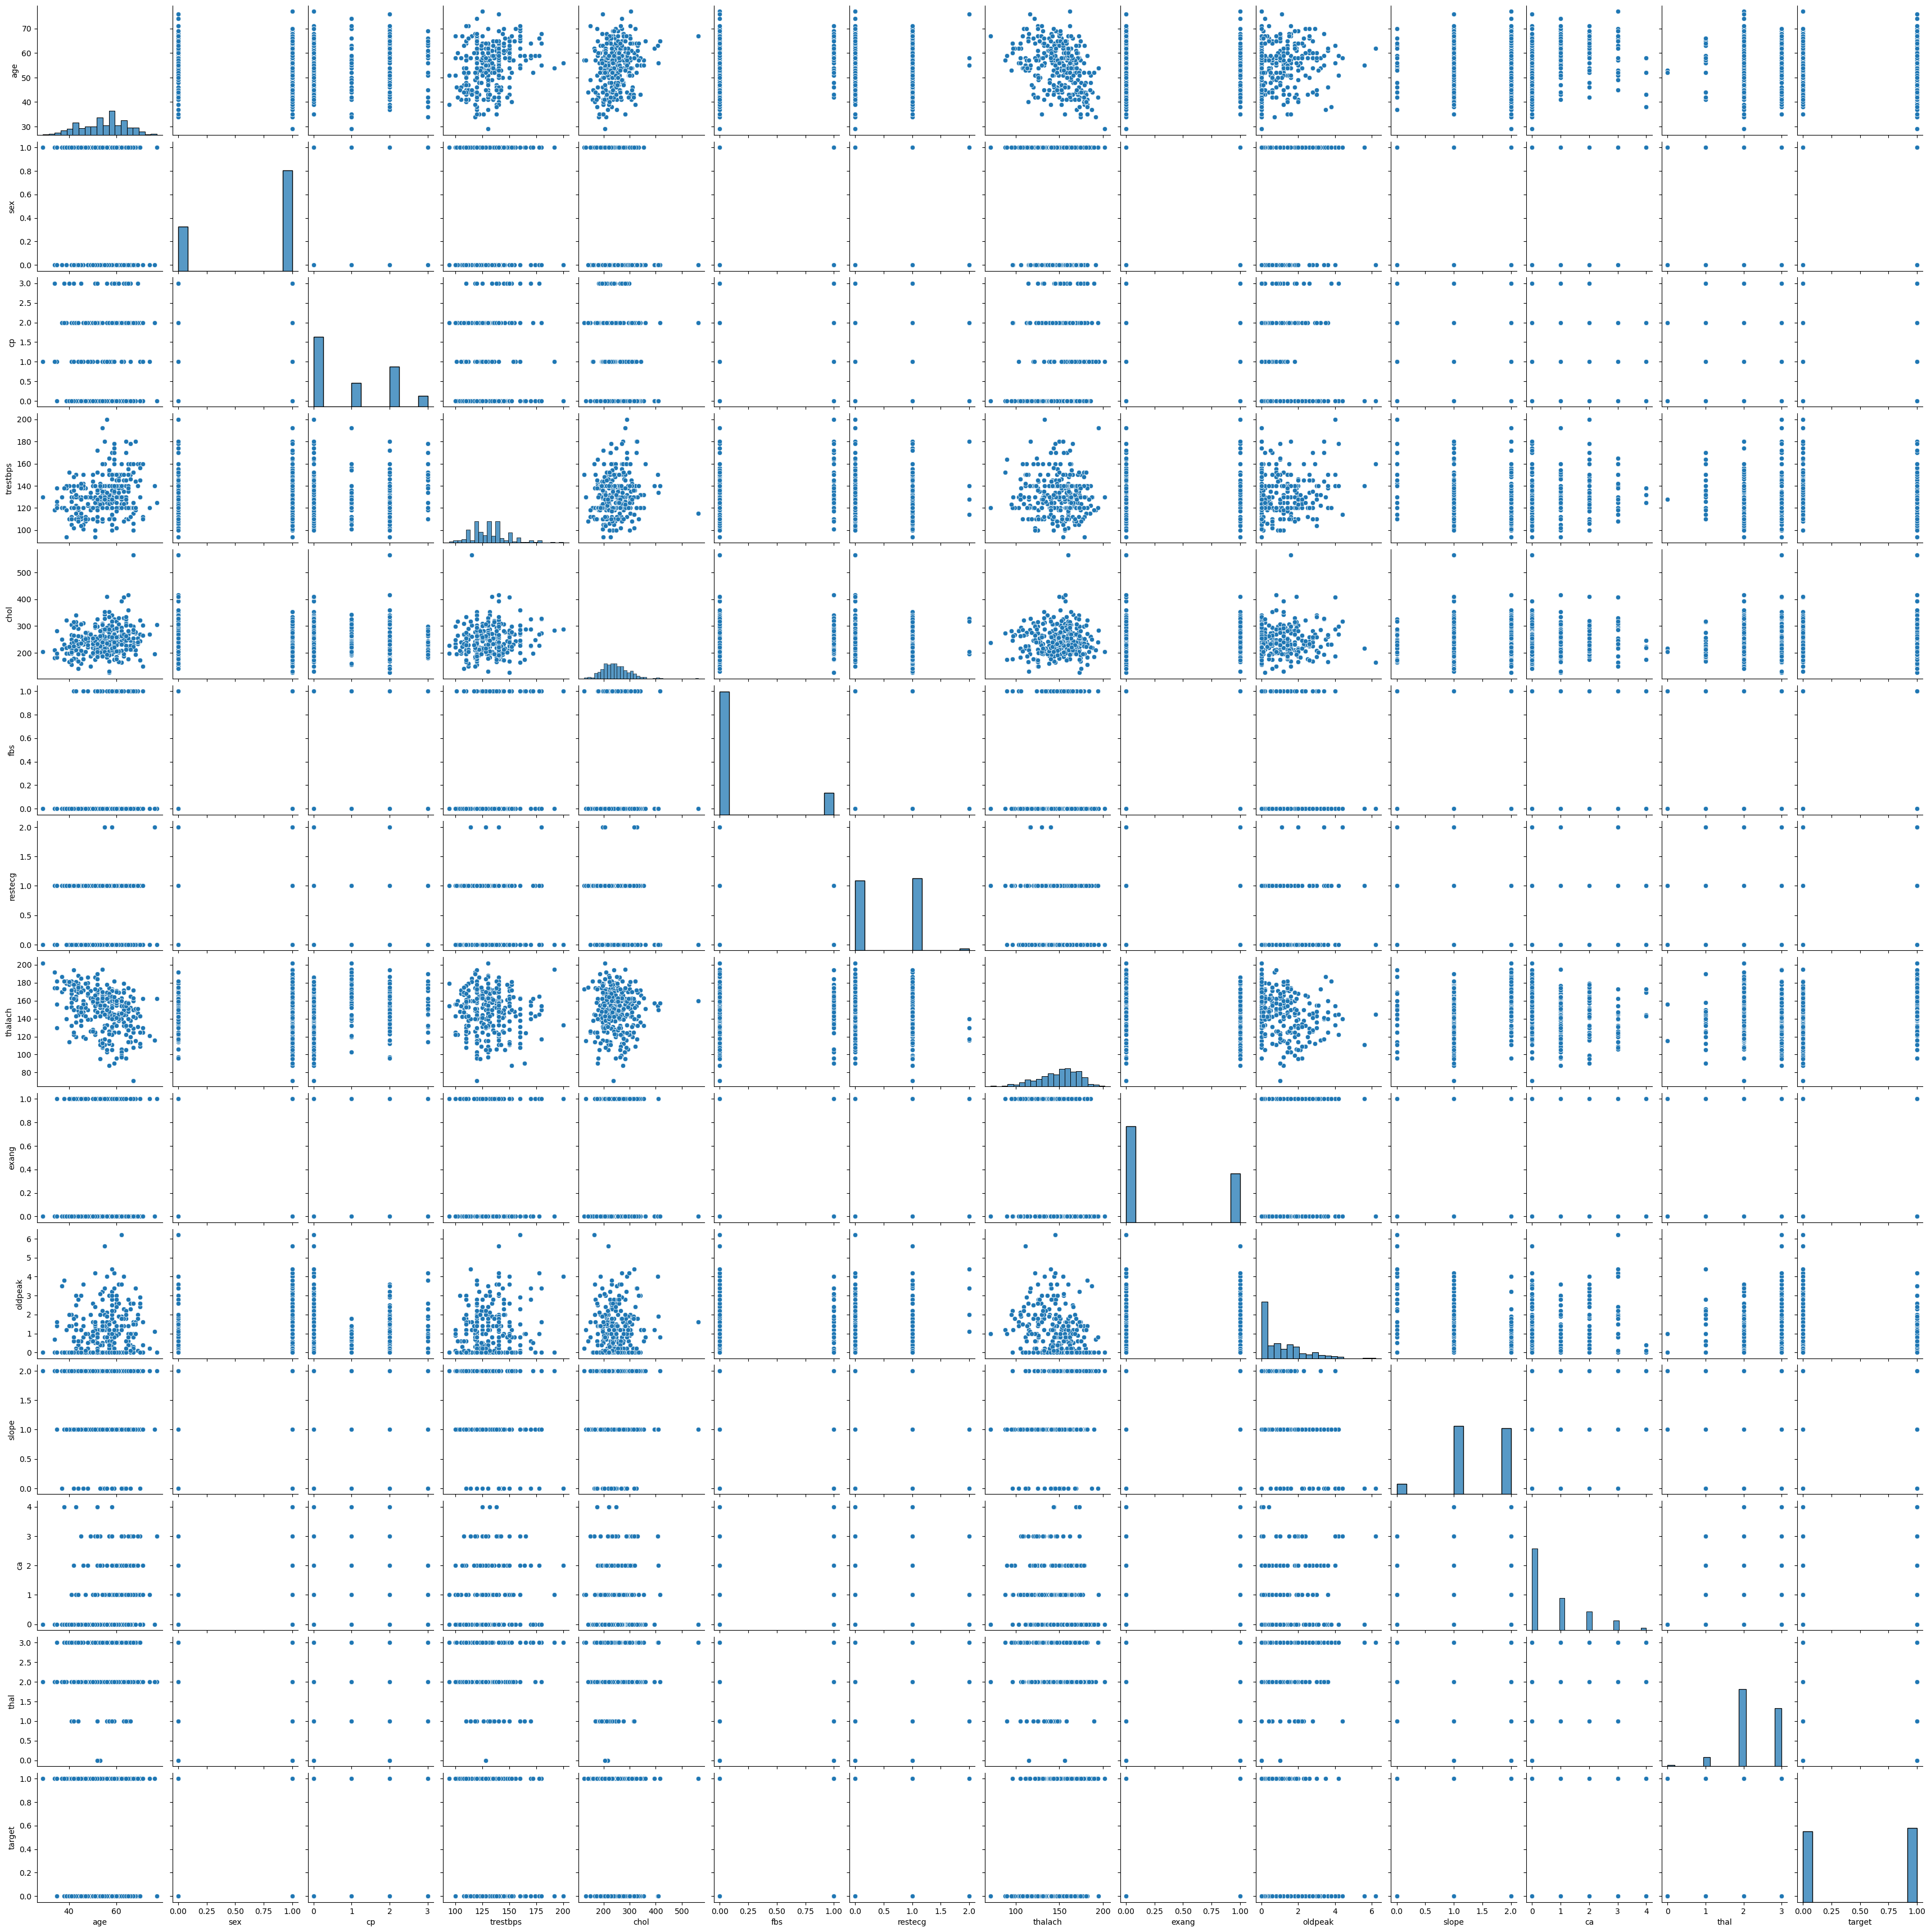

In [5]:
print("\nVisualizing Pairplots for Numerical Features:")

plt.figure(figsize=(20, 20))  # Increase the plot size

sns.pairplot(data)

plt.show()

In [9]:
y = data["target"]  # Target variable

X = data.drop('target', axis=1)  # Features (independent variables)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.20, random_state=0

)

In [11]:
scale = StandardScaler()

X_train = scale.fit_transform(X_train)  # Fit and transform training data

X_test = scale.transform(X_test)

In [12]:
model = LogisticRegression()

model.fit(X_train, y_train)

print("\nLogistic Regression Model Trained Successfully!")


Logistic Regression Model Trained Successfully!


In [13]:
y_predict = model.predict(X_test)

print("\nPredictions on Test Data:")

print(y_predict)


Predictions on Test Data:
[1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1]



Confusion Matrix:


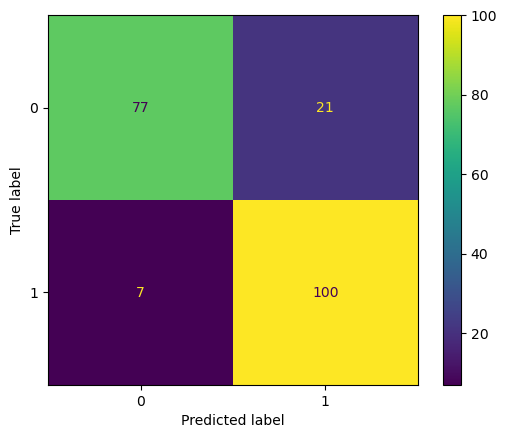

In [14]:
conf_matrix = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

print("\nConfusion Matrix:")

cm_display.plot()

plt.show()

In [15]:
print("\nClassification Report:")

print(classification_report(y_test, y_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



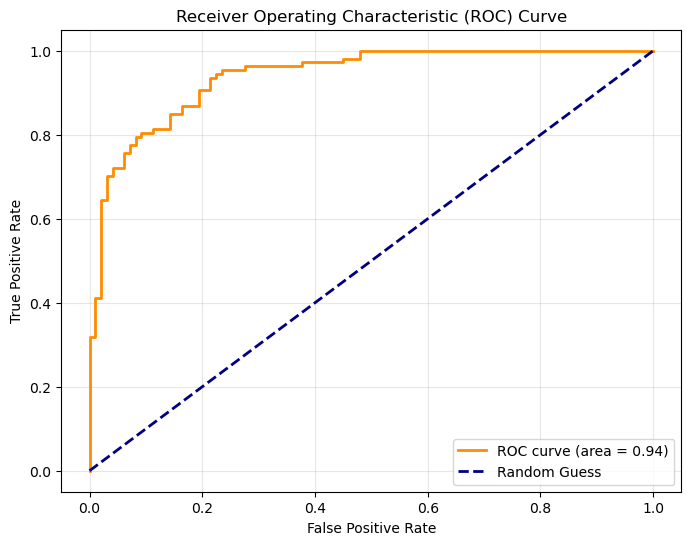

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()